In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets, model_selection
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn import preprocessing

In [2]:
data = pd.read_csv("data/train.csv")

In [3]:
data = data.drop(["Condition1", "Condition2",
                 "MiscVal", "MiscFeature", "GarageYrBlt",
                 "GarageCars", "GarageFinish", "GarageType",
                 "Fireplaces", "FireplaceQu", "PavedDrive", "MasVnrArea",
                  "MasVnrType", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
                  "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch",
                  "ScreenPorch", "BsmtFinType1", "BsmtFinType2",
                  "BsmtFinSF1", "BsmtFinSF2", "Id", "PoolQC", "Fence", "Alley", "PoolArea",
                  "Exterior1st", "Exterior2nd", "BsmtExposure", "MoSold", "YrSold", "YearBuilt"
                  ], axis=1)


In [4]:
data['bathrooms'] = data[["BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath"]].sum(axis=1)
data = data.drop(["BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath"], axis=1)


D:\anaconda\envs\py36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


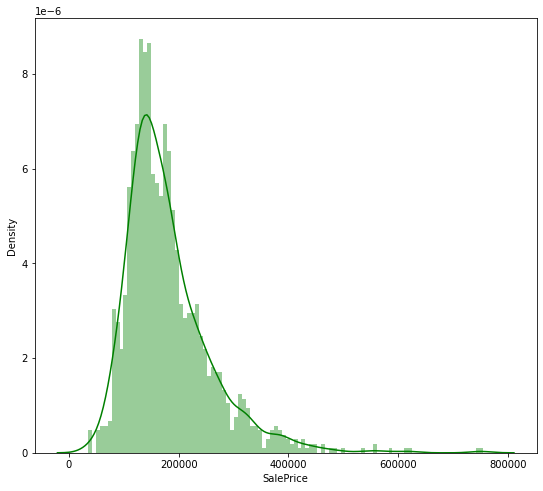

In [5]:
plt.figure(figsize=(9, 8))
sns.distplot(data['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [6]:
df_num = data.select_dtypes(include = ['float64', 'int64']).drop(["MSSubClass"], axis=1)
df_num
# df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose information

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,BsmtUnfSF,TotalBsmtSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageArea,SalePrice,bathrooms
0,65.0,8450,7,5,2003,150,856,1710,3,1,8,548,208500,4
1,80.0,9600,6,8,1976,284,1262,1262,3,1,6,460,181500,3
2,68.0,11250,7,5,2002,434,920,1786,3,1,6,608,223500,4
3,60.0,9550,7,5,1970,540,756,1717,3,1,7,642,140000,2
4,84.0,14260,8,5,2000,490,1145,2198,4,1,9,836,250000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,6,5,2000,953,953,1647,3,1,7,460,175000,3
1456,85.0,13175,6,6,1988,589,1542,2073,3,1,7,500,210000,3
1457,66.0,9042,7,9,2006,877,1152,2340,4,1,9,252,266500,2
1458,68.0,9717,5,6,1996,0,1078,1078,2,1,5,240,142125,2


In [7]:
df_num_corr = df_num.corr()['SalePrice'][:-1] # -1 because the latest row is SalePrice
golden_features_list = df_num_corr[abs(df_num_corr) > 0].sort_values(ascending=False)
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))


There is 13 strongly correlated values with SalePrice:
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageArea      0.623431
TotalBsmtSF     0.613581
TotRmsAbvGrd    0.533723
YearRemodAdd    0.507101
LotFrontage     0.351799
LotArea         0.263843
BsmtUnfSF       0.214479
BedroomAbvGr    0.168213
OverallCond    -0.077856
KitchenAbvGr   -0.135907
Name: SalePrice, dtype: float64


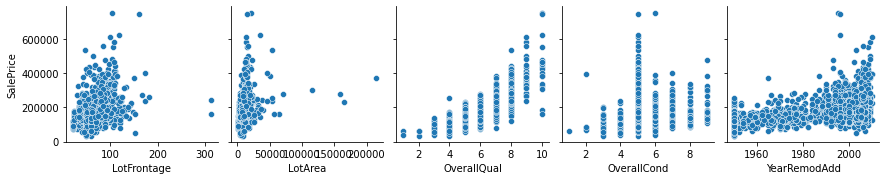

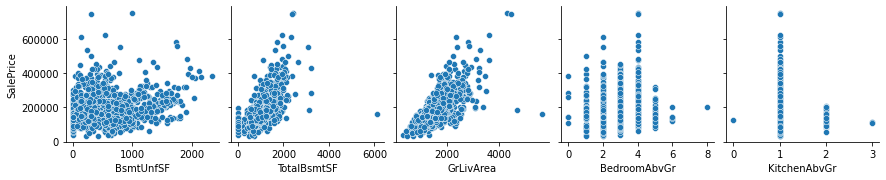

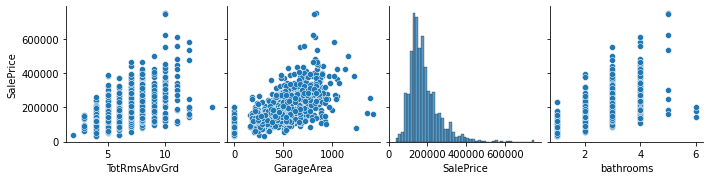

In [8]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['SalePrice'])

In [9]:
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,BsmtUnfSF,TotalBsmtSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageArea,SalePrice,bathrooms
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1984.865753,567.240411,1057.429452,1515.463699,2.866438,1.046575,6.517808,472.980137,180921.195890,2.430822
std,42.300571,24.284752,9981.264932,1.382997,1.112799,20.645407,441.866955,438.705324,525.480383,0.815778,0.220338,1.625393,213.804841,79442.502883,0.922647
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1950.000000,0.000000,0.000000,334.000000,0.000000,0.000000,2.000000,0.000000,34900.000000,1.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1967.000000,223.000000,795.750000,1129.500000,2.000000,1.000000,5.000000,334.500000,129975.000000,2.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1994.000000,477.500000,991.500000,1464.000000,3.000000,1.000000,6.000000,480.000000,163000.000000,2.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2004.000000,808.000000,1298.250000,1776.750000,3.000000,1.000000,7.000000,576.000000,214000.000000,3.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2336.000000,6110.000000,5642.000000,8.000000,3.000000,14.000000,1418.000000,755000.000000,6.000000


In [10]:
data = data[data["LotFrontage"] < 200]
data = data[data["LotArea"] < 10000]
data = data[data["TotalBsmtSF"] < 4000]
data = data[data["GrLivArea"] < 4000]

In [11]:
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,BsmtUnfSF,TotalBsmtSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageArea,SalePrice,bathrooms
count,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000
mean,63.296245,60.753825,7269.973574,5.769124,5.635605,1982.536857,542.255911,941.634214,1336.115438,2.716273,1.055633,6.068150,410.809458,152590.689847,2.191933
std,46.940339,17.350774,2208.020707,1.239819,1.155421,21.985712,404.586237,348.172613,398.564935,0.784707,0.246916,1.411089,198.517419,55607.578013,0.874836
min,20.000000,21.000000,1300.000000,1.000000,2.000000,1950.000000,0.000000,0.000000,334.000000,0.000000,0.000000,2.000000,0.000000,34900.000000,1.000000
25%,20.000000,50.000000,6050.000000,5.000000,5.000000,1961.000000,220.000000,744.000000,1049.000000,2.000000,1.000000,5.000000,281.000000,118911.000000,2.000000
50%,50.000000,60.000000,7931.000000,6.000000,5.000000,1991.000000,483.000000,912.000000,1302.000000,3.000000,1.000000,6.000000,440.000000,140000.000000,2.000000
75%,85.000000,71.000000,9000.000000,7.000000,6.000000,2004.000000,780.000000,1143.500000,1577.500000,3.000000,1.000000,7.000000,531.500000,179450.000000,3.000000
max,190.000000,153.000000,9986.000000,9.000000,9.000000,2010.000000,1869.000000,2524.000000,2828.000000,6.000000,3.000000,12.000000,1052.000000,424870.000000,6.000000


In [21]:
for d in df_num.columns:
    print(d)

LotFrontage
LotArea
OverallQual
OverallCond
YearRemodAdd
BsmtUnfSF
TotalBsmtSF
GrLivArea
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
GarageArea
SalePrice
bathrooms


In [26]:
for d in df_num.columns:
    print(data[d])
    max_value = data[d].max()
    min_value = data[d].min()
    new_value = (data[d]-min_value)/(max_value-min_value)
    data[d] = new_value

0       65.0
1       80.0
3       60.0
8       51.0
9       50.0
        ... 
1454    62.0
1455    62.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 719, dtype: float64
0       8450
1       9600
3       9550
8       6120
9       7420
        ... 
1454    7500
1455    7917
1457    9042
1458    9717
1459    9937
Name: LotArea, Length: 719, dtype: int64
0       7
1       6
3       7
8       7
9       5
       ..
1454    7
1455    6
1457    7
1458    5
1459    5
Name: OverallQual, Length: 719, dtype: int64
0       5
1       8
3       5
8       5
9       6
       ..
1454    5
1455    5
1457    9
1458    6
1459    6
Name: OverallCond, Length: 719, dtype: int64
0       2003
1       1976
3       1970
8       1950
9       1950
        ... 
1454    2005
1455    2000
1457    2006
1458    1996
1459    1965
Name: YearRemodAdd, Length: 719, dtype: int64
0       150
1       284
3       540
8       952
9       140
       ... 
1454    811
1455    953
1457    877
1458      0
1459   

In [27]:
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,BsmtUnfSF,TotalBsmtSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageArea,SalePrice,bathrooms
count,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000
mean,63.296245,0.301165,0.687310,0.596140,0.519372,0.542281,0.290132,0.373072,0.401811,0.452712,0.351878,0.406815,0.390503,0.301794,0.238387
std,46.940339,0.131445,0.254205,0.154977,0.165060,0.366429,0.216472,0.137945,0.159810,0.130785,0.082305,0.141109,0.188705,0.142595,0.174967
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.219697,0.546857,0.500000,0.428571,0.183333,0.117710,0.294770,0.286688,0.333333,0.333333,0.300000,0.267110,0.215429,0.200000
50%,50.000000,0.295455,0.763412,0.625000,0.428571,0.683333,0.258427,0.361331,0.388132,0.500000,0.333333,0.400000,0.418251,0.269508,0.200000
75%,85.000000,0.378788,0.886484,0.750000,0.571429,0.900000,0.417335,0.453051,0.498597,0.500000,0.333333,0.500000,0.505228,0.370670,0.400000
max,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
"""
Remove outliers
Deal with categorical data
"""
df_cat = data.select_dtypes(include = ['object'])
df_cat['MSSubClass'] = data['MSSubClass']

categorical_col = df_cat.columns
for col in categorical_col:
    data[col] = data[col].astype("categorical")


TypeError: data type 'categorical' not understood